**Data Description**

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 배급한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

**Goal of project**
다음 분기에 어떤 게임을 설계해야 할까

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

In [3]:
df = pd.read_csv("vgames2.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)#Index제거
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
df.info()
 #Year가 float (to int)
 #sales data들이 object (to float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
#Year 칼럼 int로
df['Year'] = df['Year'].fillna(-1).astype('int') #그냥 int로 바꾸면 Na는 int로 바꿀 수 없다고 뜸.
df['Year']=df.Year.astype(int)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
#Sales 칼럼들 float으로
dfsales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
dfothers = df[['Name','Platform','Year','Genre','Publisher']]
dfsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NA_Sales     16598 non-null  object
 1   EU_Sales     16598 non-null  object
 2   JP_Sales     16598 non-null  object
 3   Other_Sales  16598 non-null  object
dtypes: object(4)
memory usage: 518.8+ KB


In [7]:
dfsales.astype(float)#문자열 K같은 게 포함 됨.다시 살펴보자

ValueError: ignored

In [8]:
#문자열을 포함한 자료들
dfsales[dfsales['NA_Sales'].str.contains("[a-zA-Z]") | dfsales['EU_Sales'].str.contains("[a-zA-Z]") | dfsales['JP_Sales'].str.contains("[a-zA-Z]") | dfsales['Other_Sales'].str.contains("[a-zA-Z]")]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,480K,0.33M,0K,0.06
36,0.3,0.03M,0.04,0.03
45,60K,0.08,0.16,0.03
64,0.01,0,0,0M
73,0.22,0.06,0,0.01M
...,...,...,...,...
16525,0.01,0K,0,0
16571,0,0M,0.02,0
16578,320K,0.22,0,0.04
16580,0,0.03,0M,0


    - 단위가 K(1000)와 M(1,000,000)으로 섞임
    - 문자열 포함.

In [9]:
#K단위 M으로 통일 + 문자 삭제
def ktom(a):
  if a[-1] == 'K':
    result = int(a[:-1])/1000
  else:
    result = a
  return result

dfsales['NA_Sales'] = dfsales['NA_Sales'].apply(ktom)
dfsales['EU_Sales'] = dfsales['EU_Sales'].apply(ktom)
dfsales['JP_Sales'] = dfsales['JP_Sales'].apply(ktom)
dfsales['Other_Sales'] = dfsales['Other_Sales'].apply(ktom)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [10]:
#M단위 제거 
dfsales.replace("M","",regex=True,inplace=True) #regex=True면 M을 포함만 해도 대체함(False면 값이 0.33M이면 M이 아니니까 대체하지 않음)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [11]:
#float으로 변경
dfsales = dfsales.astype(float)

In [12]:
dfsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     16598 non-null  float64
 1   EU_Sales     16598 non-null  float64
 2   JP_Sales     16598 non-null  float64
 3   Other_Sales  16598 non-null  float64
dtypes: float64(4)
memory usage: 518.8 KB


In [13]:
df = pd.concat([dfothers,dfsales],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  int64  
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [14]:
#중복치제거 결측치는 일단 놔둔다(분석에 쓰일 수 있음) 
df[df.duplicated()]
df.drop_duplicates(inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [15]:
#describe
df.describe()
df.groupby('Year').mean().head(50) #Year에 결측치와 두자리수 포함

#Year 칼럼 수정(결측치그대로, 두자리수는 4자리수로)
def edityear(a):
  if a>=0 and a <= 23:
    result = a+2000
  elif a>23 and a<100:
    result = a+1900 
  else:
    result = a
  return result

df['Year'] = df['Year'].apply(edityear)
df.groupby('Year').mean().head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
-1,0.220444,0.092630,0.024815,0.032370
1980,1.176667,0.074444,0.000000,0.013333
1981,0.726087,0.042609,0.000000,0.006957
1982,0.747778,0.045833,0.000000,0.008611
1983,0.456471,0.047059,0.476471,0.008235


In [16]:
df.info()#결측치 빼고 다 함

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16597 non-null  int64  
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.3+ MB


In [17]:
# row 생략 없이 출력=10을 None으로
pd.set_option('display.max_rows', 10)
# col 생략 없이 출력
pd.set_option('display.max_columns', 10)

df.isnull().sum()



#Name,Platform에는 결측치가 없다. Name,Platform으로 중복치를 추가로 찾기(Name은 같은데 Platform이 다르면 일단 다른 게임으로 본다.)
df[df.duplicated(subset=['Name','Platform'])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8717,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.00,0.00
12529,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13808,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.00,0.02
15705,Sonic the Hedgehog,PS3,2006,Platform,Sega,0.41,0.07,0.04,0.66


In [18]:
#Madden NFL 13
df.query("Name=='Madden NFL 13'") #다른 데이터가 같고 출하량도 적어서. 삭제
df = df.drop(8717,axis=0)

In [19]:
#Need for speed 
pd.set_option('display.max_rows', 12)
df.query("Name=='Need for Speed: Most Wanted'") #2005버전과 2012버전이 다른 것으로 판별. 삭제 X

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1318,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15
1511,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.51,0.06,0.61
2673,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05
4672,Need for Speed: Most Wanted,GBA,2005,Racing,Electronic Arts,0.19,0.07,0.00,0.00
11042,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.01,0.25
11335,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47
12177,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02
12529,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10
13617,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.14,0.12,0.00,0.02
13808,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.00,0.02


In [20]:
#Sonic the Hedgehog	
df.query("Name=='Sonic the Hedgehog'") #8651과 15705의 출하량데이터가 다르고 출하량이 0.48로 유의미한 자료라 판단되어, 별개 출하량으로 보고 데이터 병합
df['EU_Sales'][15705] = df['EU_Sales'][15705] + df['EU_Sales'][8651]
df = df.drop(8651,axis=0)
df.query("Name=='Sonic the Hedgehog'")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10045,Sonic the Hedgehog,X360,2006,Platform,Sega,0.44,0.49,0.00,0.11
14729,Sonic the Hedgehog,GEN,1991,Platform,Sega,3.03,0.91,0.26,0.13
15705,Sonic the Hedgehog,PS3,2006,Platform,Sega,0.41,0.55,0.04,0.66


In [21]:
#정제완료(결측치는 포함)
df=df.reset_index(drop=True)
df.shape
df.to_csv("vgames2_editted.csv") #csv파일로 생성
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16590,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16591,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16592,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16593,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [22]:
dfnull = df.copy()
dfnull['Year']=dfnull['Year'].replace(-1,np.nan)
dfnull[dfnull['Year']==-1]
dfnull.isnull().sum()

Name             0
Platform         0
Year           269
Genre           50
Publisher       57
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

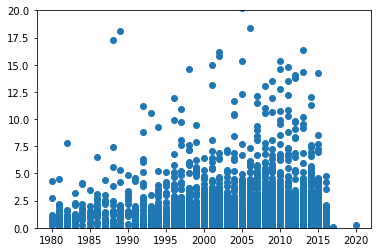

In [23]:
dfscatt = df[df["Year"]!=-1]
plt.ylim(0,20)
plt.scatter(x=dfscatt['Year'],y=((dfscatt['NA_Sales']+dfscatt['EU_Sales']+dfscatt['JP_Sales']+dfscatt['Other_Sales'])))

1.지역에 따른 장르 선호도



In [24]:
#시장크기
market = [df['NA_Sales'].sum(),df['EU_Sales'].sum(),df['JP_Sales'].sum(),df['Other_Sales'].sum()]
world=sum(market)
world, market
mkt_share = market/world
mkt_share

array([0.49271407, 0.27301134, 0.1447988 , 0.08947579])

In [25]:
mkt_share_naeujp = sum(mkt_share[:-1])
mkt_share_naeujp

0.9105242142618402

따라서, 총 출하량의 91.5%에 달하는 북미, 유럽, 일본 시장에 집중적으로 투자할 것을 건의

1)북미

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


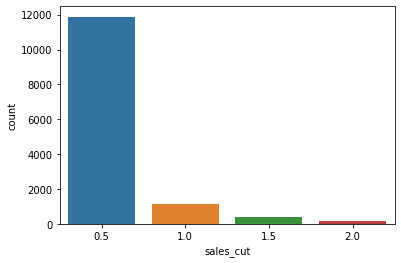

In [26]:
#-------Year결측치 제거
dfna = df.drop(labels=['EU_Sales','JP_Sales','Other_Sales'],axis=1)
dfna = dfna[dfna["Year"]!=-1]
dfna[dfna["Year"]==-1]

#0 제거, outlier제거
dfna.describe()
dfna = dfna.drop(dfna[dfna['NA_Sales']==0].index) #0제거
dfna.reset_index(drop=True)
dfna.describe()

dfna['sales_cut'] = pd.cut(dfna.NA_Sales,bins=[0,10,20,30,40,50],labels=['10','20','30','40','50'])
sns.countplot(dfna['sales_cut'])#10 이상 제거

dfna = dfna.drop(dfna[dfna['NA_Sales']>=10].index) 
dfna.reset_index(drop=True)
dfna['sales_cut'] = pd.cut(dfna.NA_Sales,bins=[0,2,4,6,8,10],labels=[2,4,5,6,10])
sns.countplot(dfna['sales_cut'])#2이상 제거

dfna = dfna.drop(dfna[dfna['NA_Sales']>=2].index) 
dfna.reset_index(drop=True)
dfna['sales_cut'] = pd.cut(dfna.NA_Sales,bins=[0, 0.5, 1, 1.5, 2],labels=[0.5, 1, 1.5, 2])
sns.countplot(dfna['sales_cut'])#2이상 제거

In [28]:
#북미지역 장르선호도
df_g_na = dfna.groupby('Genre').sum()
df_g_na = df_g_na.reset_index()
df_g_na = df_g_na.drop(['Year'],axis=1)
df_g_na = df_g_na.sort_values('NA_Sales')


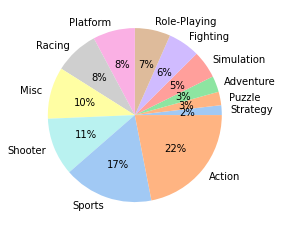

In [29]:
colors = sns.color_palette('pastel')[0:12]
plt.pie(data = df_g_na,x='NA_Sales',labels=df_g_na['Genre'],colors=colors, autopct='%.0f%%')
plt.show()

2) 유럽

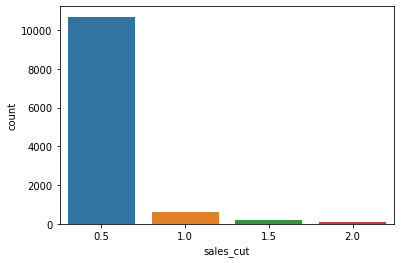

In [30]:
#-------Year결측치 제거
dfeu = df.drop(labels=['NA_Sales','JP_Sales','Other_Sales'],axis=1)
dfeu = dfeu[dfeu["Year"]!=-1]
dfeu[dfeu["Year"]==-1]

#0 제거, outlier제거
dfeu.describe()
dfeu = dfeu.drop(dfeu[dfeu['EU_Sales']==0].index) #0제거
dfeu.reset_index(drop=True)
dfeu.describe()

dfeu['sales_cut'] = pd.cut(dfeu.EU_Sales,bins=[0,10,20,30],labels=['10','20','30'])
sns.countplot(dfeu['sales_cut'])#10 이상 제거

dfeu = dfeu.drop(dfeu[dfeu['EU_Sales']>=10].index) 
dfeu.reset_index(drop=True)
dfeu['sales_cut'] = pd.cut(dfeu.EU_Sales,bins=[0,2,4,6,8,10],labels=[2,4,5,6,10])
sns.countplot(dfeu['sales_cut'])#2이상 제거

dfeu = dfeu.drop(dfeu[dfeu['EU_Sales']>=2].index) 
dfeu.reset_index(drop=True)
dfeu['sales_cut'] = pd.cut(dfeu.EU_Sales,bins=[0, 0.5, 1, 1.5, 2],labels=[0.5, 1, 1.5, 2])
sns.countplot(dfeu['sales_cut'])#2이상 제거

In [31]:
#유럽지역 장르선호도
df_g_eu = dfeu.groupby('Genre').sum()
df_g_eu = df_g_eu.reset_index()
df_g_eu = df_g_eu.drop(['Year'],axis=1)
df_g_eu = df_g_eu.sort_values('EU_Sales')

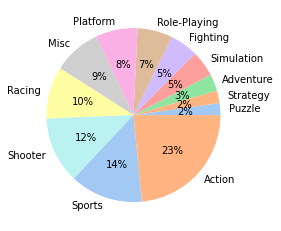

In [32]:
colors = sns.color_palette('pastel')[0:12]
plt.pie(data = df_g_eu,x='EU_Sales',labels=df_g_eu['Genre'],colors=colors, autopct='%.0f%%')
plt.show()

3) 일본

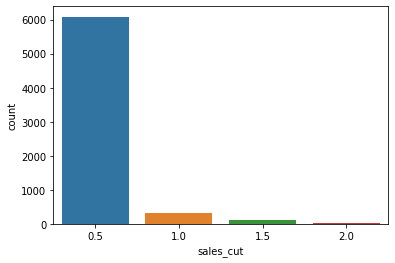

In [33]:
#-------Year결측치 제거
dfjp = df.drop(labels=['NA_Sales','EU_Sales','Other_Sales'],axis=1)
dfjp = dfjp[dfjp["Year"]!=-1]
dfjp[dfjp["Year"]==-1]

#0 제거, outlier제거
dfjp.describe()
dfjp = dfjp.drop(dfjp[dfjp['JP_Sales']==0].index) #0제거
dfjp.reset_index(drop=True)
dfjp.describe()

dfjp['sales_cut'] = pd.cut(dfjp.JP_Sales,bins=[0,10,20],labels=['10','20'])
sns.countplot(dfjp['sales_cut'])#10 이상 제거

dfjp = dfjp.drop(dfjp[dfjp['JP_Sales']>=10].index) 
dfjp.reset_index(drop=True)
dfjp['sales_cut'] = pd.cut(dfjp.JP_Sales,bins=[0,2,4,6,8,10],labels=[2,4,5,6,10])
sns.countplot(dfjp['sales_cut'])#2이상 제거

dfjp = dfjp.drop(dfjp[dfjp['JP_Sales']>=2].index) 
dfjp.reset_index(drop=True)
dfjp['sales_cut'] = pd.cut(dfjp.JP_Sales,bins=[0, 0.5, 1, 1.5, 2],labels=[0.5, 1, 1.5, 2])
sns.countplot(dfjp['sales_cut'])#2이상 제거

In [34]:
#북미지역 장르선호도
df_g_jp = dfjp.groupby('Genre').sum()
df_g_jp = df_g_jp.reset_index()
df_g_jp = df_g_jp.drop(['Year'],axis=1)
df_g_jp = df_g_jp.sort_values('JP_Sales')

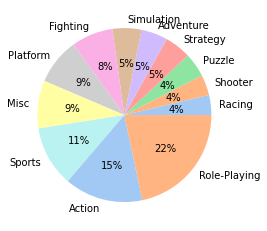

In [35]:
colors = sns.color_palette('pastel')[0:12]
plt.pie(data = df_g_jp,x='JP_Sales',labels=df_g_jp['Genre'],colors=colors, autopct='%.0f%%')
plt.show()

따라서 다음 분기의 게임 장르는 세 시장 모두에서 최상위권을 차지한 Action 장르의 게임을 출시할 것을 건의

2. 연도별 게임 트렌드

In [36]:
#year결측치제거
dfy=df[df['Year']!=-1]
dfy=dfy.sort_values('Year')
dfy=dfy.reset_index(drop=True)

#outlier 제거
dfy_normal = dfy.drop(dfy.query("NA_Sales > 2").index)
dfy_normal = dfy_normal.drop(dfy_normal.query("EU_Sales > 2").index)
dfy_normal = dfy_normal.drop(dfy_normal.query("JP_Sales > 2").index)
dfy_normal = dfy_normal.drop(dfy_normal.query("Other_Sales > 2").index)
dfy_mormal = dfy_normal.reset_index(drop=True)
dfy_normal

#합계판매량 칼럼추가
dfy_normal['Total_Sales'] = dfy_normal['NA_Sales'] + dfy_normal['EU_Sales'] + dfy_normal['JP_Sales'] + dfy_normal['Other_Sales']
dfy_normal.groupby(['Genre','Year']).sum()


NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
Genre    Year                                                        
Action   1980      0.32      0.02      0.00         0.00         0.34
         1981     11.80      0.69      0.00         0.10        12.59
         1982      6.07      0.38      0.00         0.05         6.50
         1983      2.67      0.17      0.00         0.02         2.86
         1984      0.80      0.19      0.83         0.03         1.85
...                 ...       ...       ...          ...          ...
Strategy 2012      0.94      0.99      1.11         0.29         3.33
         2013      2.39      2.47      0.82         0.64         6.32
         2014      0.16      0.22      0.55         0.04         0.97
         2015      0.57      0.98      0.15         0.12         1.82
         2016      0.11      0.32      0.05         0.04         0.52

[382 rows x 5 columns]

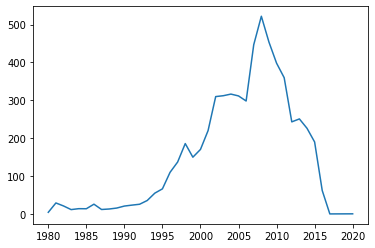

In [37]:
#시장크기변화
ts_ts = dfy_normal.groupby(['Year']).sum()
ts_ts =ts_ts.reset_index()
plt.plot(ts_ts['Year'], ts_ts['Total_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

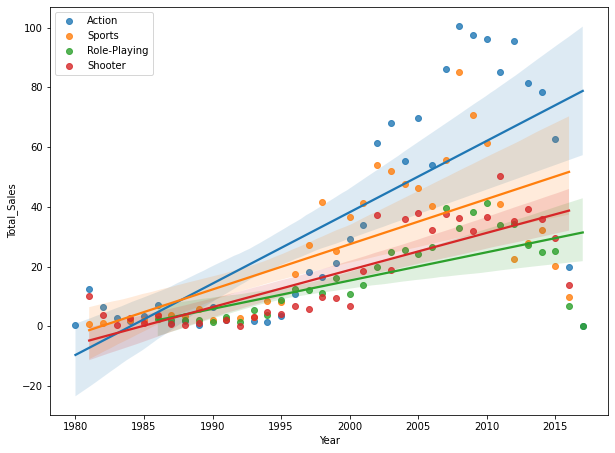

In [41]:
ts_g = dfy_normal.groupby(['Genre','Year'])['Total_Sales'].sum()
ts_g = ts_g.reset_index()
df['Genre'].unique()
plt.figure(figsize=(10,7.5))
ts_g_a = ts_g.query("Genre == 'Action'")
ts_g_ad = ts_g.query("Genre == 'Adventure'")
ts_g_m = ts_g.query("Genre == 'Misc'")
ts_g_p = ts_g.query("Genre == 'Platform'")
ts_g_sp = ts_g.query("Genre == 'Sports'")
ts_g_si = ts_g.query("Genre == 'Simulation'")
ts_g_ra = ts_g.query("Genre == 'Racing'")
ts_g_ro = ts_g.query("Genre == 'Role-Playing'")
ts_g_puz = ts_g.query("Genre == 'Puzzle'")
ts_g_stra = ts_g.query("Genre == 'Strategy'")
ts_g_fi = ts_g.query("Genre == 'Fighting'")
ts_g_shoot = ts_g.query("Genre == 'Shooter'")
sns.regplot(ts_g_a['Year'], ts_g_a['Total_Sales'],label="Action")

sns.regplot(ts_g_sp['Year'], ts_g_sp['Total_Sales'],label="Sports")

sns.regplot(ts_g_ro['Year'], ts_g_ro['Total_Sales'],label="Role-Playing")

sns.regplot(ts_g_shoot['Year'], ts_g_shoot['Total_Sales'],label="Shooter")
plt.legend()
plt.show()


2000년이후 Action 장르의 출하량이 지속적으로 가장 높게 위치함.

따라서 다음 분기 장르는 Action 장르를 제안

3. 출고량이 높은 게임에 대한 분석

  이상치 제거에서 2백만 이상 판매될 경우를 Outlier로 보고 분석에서 제외함.
  
  따라서 기존 분석에서 제외된 Outlier들에 대한 분석을 진행





In [44]:
df[df['Total_Sales']>2].shape
846/16500

0.051272727272727275

In [42]:
#히트작의 플랫폼
df['Total_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
dfo = df[df['Total_Sales']>2]
plt.figure(figsize=(15,10))
sns.countplot(dfo['Platform'])

플레이션 포터블과 플레이스테이션 비타를 포함한 플레이스테이션 플랫폼이 압도적으로 높다. 예산이 안된다면 플레이스테이션 플랫폼에 집중하는 게 좋겠다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


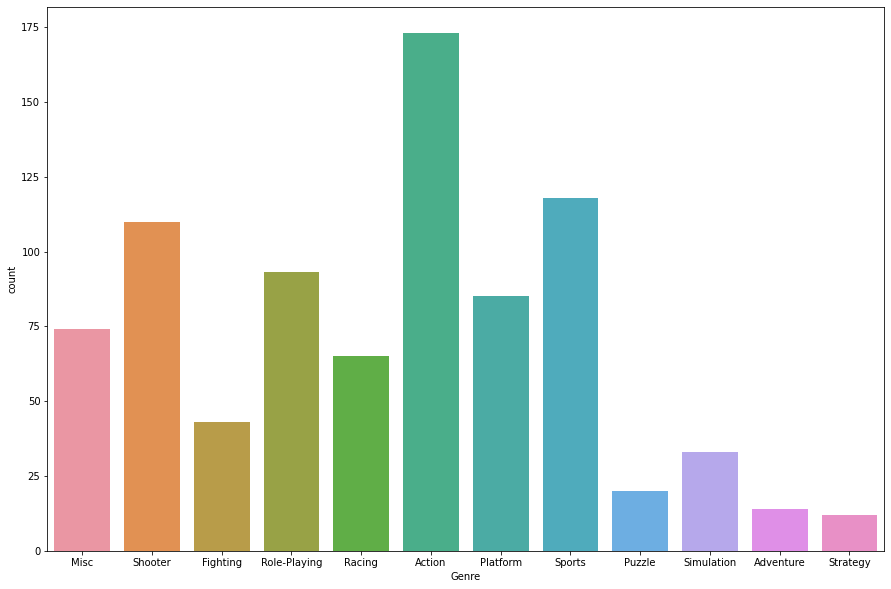

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(dfo['Genre'])

히트작의 장르 빈도수도 Action이 높다. 

4. 결론 

  1) 지역에 따른 장르 선호도에서 Action장르가 북미,유럽지역에서 최상위권을 차지했다.(일본에서는 2위)
  
  2)연도별로는 2000년 이후에 Action 장르가 계속 우세했다.

  3)출고량이 높은 '히트작'에서도 Action장르가 우세했다. 플랫폼은 플레이스테이션 시리즈가 시장지배적이었다. 

  4)따라서 다음 분기 게임의 장르는 Action을, 플랫폼은 플레이스테이션을 제안한다.

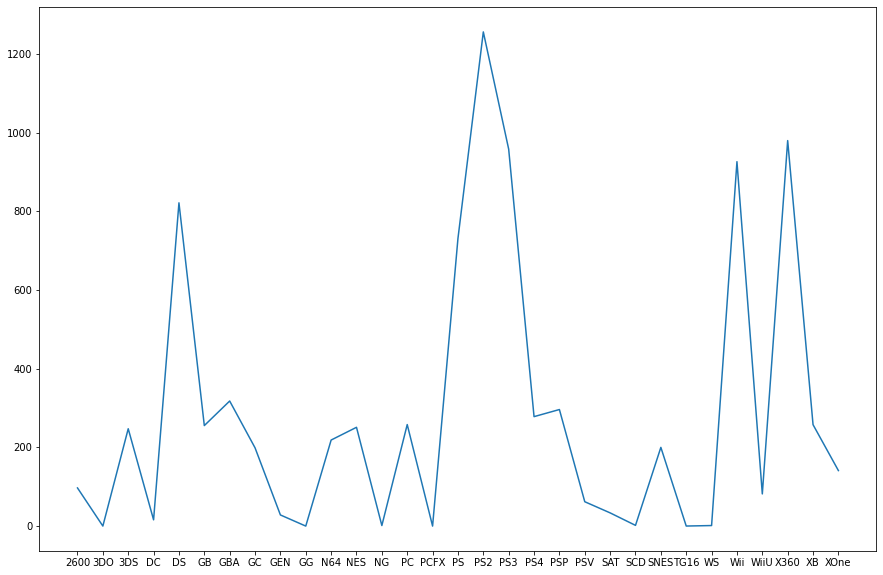

In [50]:
#전체데이터의 플랫폼별 총 출하량
df10=df.groupby('Platform').sum()
plt.figure(figsize=(15,10))

plt.plot(df10['Total_Sales'])